In [1]:
#@ Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results@

from scipy.stats import norm

# Input values
population_mean = 100  # Known population mean
population_std_dev = 15  # Known population standard deviation
sample_mean = 105  # Mean of the sample
sample_size = 30  # Size of the sample

# Calculate the Z-score
z_score = (sample_mean - population_mean) / (population_std_dev / (sample_size ** 0.5))

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Output the Z-score and p-value
print("Z-score:", z_score)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")


Z-score: 1.8257418583505538
P-value: 0.067889154861829
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [2]:
#Q2  Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python

import numpy as np
from scipy.stats import ttest_1samp

# Simulate random data (sample)
np.random.seed(42)  # Set seed for reproducibility
sample_data = np.random.normal(loc=105, scale=10, size=30)  # Mean=105, StdDev=10, Size=30

# Define the population mean
population_mean = 100

# Perform a one-sample t-test
t_statistic, p_value = ttest_1samp(sample_data, population_mean)

# Print results
print("Sample Data:", sample_data)
print("T-Statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")


Sample Data: [109.96714153 103.61735699 111.47688538 120.23029856 102.65846625
 102.65863043 120.79212816 112.67434729 100.30525614 110.42560044
 100.36582307 100.34270246 107.41962272  85.86719755  87.75082167
  99.37712471  94.8716888  108.14247333  95.91975924  90.87696299
 119.65648769 102.742237   105.67528205  90.75251814  99.55617275
 106.1092259   93.49006423 108.75698018  98.9936131  102.0830625 ]
T-Statistic: 1.8978639992981083
P-value: 0.0677090662485928
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [3]:
#Q3  Implement a one-sample Z-test using Python to compare the sample mean with the population mean@

import numpy as np
from scipy.stats import norm

# Define inputs
population_mean = 100  # Population mean
population_std_dev = 15  # Population standard deviation
sample_data = [105, 110, 95, 100, 108, 112, 98, 101, 97, 106]  # Sample data

# Calculate sample mean and size
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Calculate Z-score
z_score = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))

# Calculate P-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Print results
print("Sample Mean:", sample_mean)
print("Z-Score:", z_score)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")


Sample Mean: 103.2
Z-Score: 0.6746192341692548
P-Value: 0.4999177096472964
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


Sample Mean: 103.2
Z-Score: 0.6746192341692548
P-Value: 0.4999177096472964
Critical Z-Value: 1.959963984540054
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


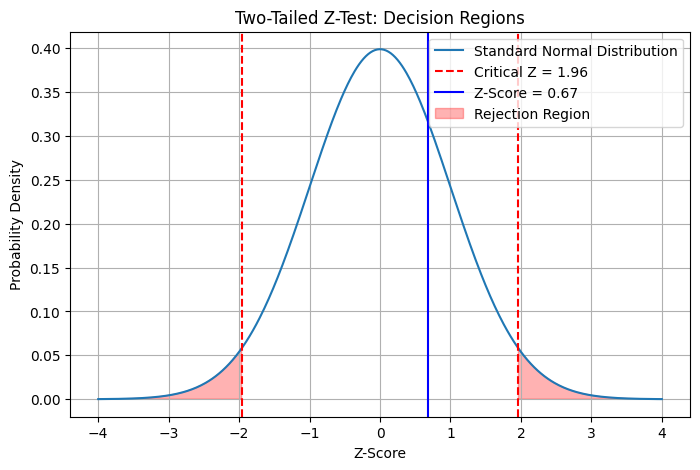

In [4]:
#Q4 Perform a two-tailed Z-test using Python and visualize the decision region on a plot@

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define inputs
population_mean = 100  # Population mean
population_std_dev = 15  # Population standard deviation
sample_data = [105, 110, 95, 100, 108, 112, 98, 101, 97, 106]  # Sample data
alpha = 0.05  # Significance level

# Calculate sample mean and size
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Calculate Z-score
z_score = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))

# Calculate critical Z-values for a two-tailed test
z_critical = norm.ppf(1 - alpha / 2)

# Calculate P-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Print results
print("Sample Mean:", sample_mean)
print("Z-Score:", z_score)
print("P-Value:", p_value)
print("Critical Z-Value:", z_critical)

if abs(z_score) > z_critical:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

# Visualization
x = np.linspace(-4, 4, 500)
y = norm.pdf(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Standard Normal Distribution")
plt.axvline(z_critical, color='red', linestyle='--', label=f"Critical Z = {z_critical:.2f}")
plt.axvline(-z_critical, color='red', linestyle='--')
plt.axvline(z_score, color='blue', linestyle='-', label=f"Z-Score = {z_score:.2f}")
plt.fill_between(x, 0, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3, label="Rejection Region")
plt.title("Two-Tailed Z-Test: Decision Regions")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
#Q5 -@ Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing@

from scipy.stats import norm

# Inputs
population_mean = 100  # Null hypothesis mean
true_mean = 108        # Actual population mean
population_std_dev = 15  # Standard deviation of population
sample_size = 30         # Sample size
alpha = 0.05             # Significance level

# Calculate the critical value for a two-tailed test
z_critical = norm.ppf(1 - alpha / 2)
margin_of_error = z_critical * (population_std_dev / (sample_size ** 0.5))
lower_critical = population_mean - margin_of_error
upper_critical = population_mean + margin_of_error

# Calculate Type 1 Error (alpha)
type1_error = alpha

# Calculate Type 2 Error (beta)
beta_area = norm.cdf(upper_critical, loc=true_mean, scale=population_std_dev / (sample_size ** 0.5)) - \
            norm.cdf(lower_critical, loc=true_mean, scale=population_std_dev / (sample_size ** 0.5))
type2_error = beta_area

# Results
print(f"Critical Values: {lower_critical:.2f} to {upper_critical:.2f}")
print(f"Type 1 Error (alpha): {type1_error:.2f}")
print(f"Type 2 Error (beta): {type2_error:.2f}")


Critical Values: 94.63 to 105.37
Type 1 Error (alpha): 0.05
Type 2 Error (beta): 0.17


In [6]:
#Q6 Write a Python program to perform an independent T-test and interpret the results@

from scipy import stats

# Sample data (replace with your actual data)
data1 = [10, 12, 15, 18, 20]
data2 = [8, 11, 13, 16, 19]

# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level (common choice)

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant difference between the means of the two groups.")

T-statistic: 0.602167943595985
P-value: 0.5637356255524366
Fail to reject the null hypothesis.
There is no statistically significant difference between the means of the two groups.


T-statistic: -6.531972647421809
P-value: 0.0028378459267344464
Reject the null hypothesis.
There is a statistically significant difference between the paired samples.


<ipython-input-7-d77acfff2ae8>:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], labels=['Sample 1', 'Sample 2'])


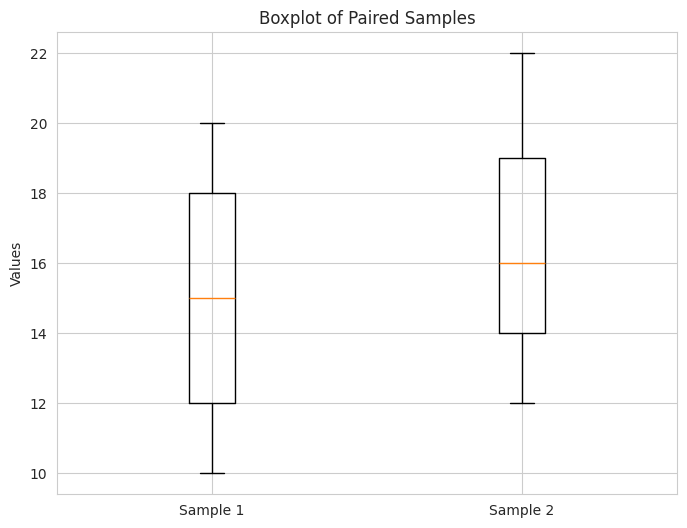

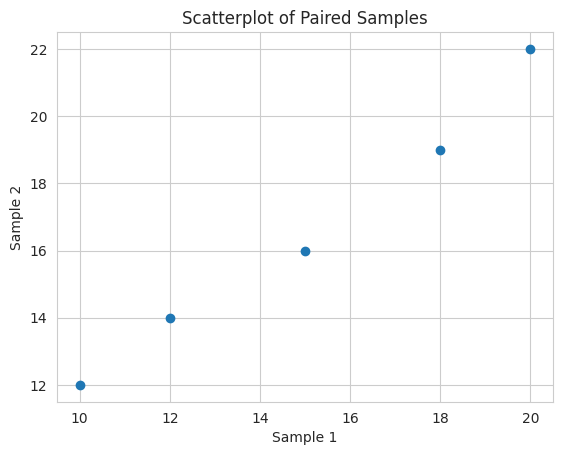

In [7]:
#Q7  Perform a paired sample T-test using Python and visualize the comparison results@

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
data1 = [10, 12, 15, 18, 20]
data2 = [12, 14, 16, 19, 22]

# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(data1, data2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant difference between the paired samples.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant difference between the paired samples.")

# Visualize the data
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Create a boxplot to compare the distributions
plt.boxplot([data1, data2], labels=['Sample 1', 'Sample 2'])
plt.title('Boxplot of Paired Samples')
plt.ylabel('Values')
plt.show()

# Create a scatterplot to visualize the paired data
plt.scatter(data1, data2)
plt.xlabel('Sample 1')
plt.ylabel('Sample 2')
plt.title('Scatterplot of Paired Samples')
plt.show()

In [9]:
#Q8  Simulate data and perform both Z-test and T-test, then compare the results using Python@

import numpy as np
from scipy import stats

# Simulation parameters
population_mean = 100
population_std_dev = 15
sample_size = 30

# Simulate sample data
data = np.random.normal(loc=population_mean, scale=population_std_dev, size=sample_size)

# Hypothesized population mean
hypothesized_mean = 95

# Perform Z-test
z_stat, p_value_z = stats.zscore(data), stats.norm.sf(abs(z_stat))*2

# Perform t-test
t_stat, p_value_t = stats.ttest_1samp(data, popmean=hypothesized_mean)

# Print results
print("Sample Mean:", np.mean(data))
print("Z-statistic:", z_stat)
print("Z-test p-value:", p_value_z)
print("T-statistic:", t_stat)
print("T-test p-value:", p_value_t)

# Compare results
if abs(z_stat) > abs(t_stat):
    print("\nZ-statistic is more extreme.")
else:
    print("\nT-statistic is more extreme.")

# Interpretation
alpha = 0.05  # Significance level
if p_value_z < alpha:
    print("Z-test: Reject the null hypothesis.")
else:
    print("Z-test: Fail to reject the null hypothesis.")

if p_value_t < alpha:
    print("T-test: Reject the null hypothesis.")
else:
    print("T-test: Fail to reject the null hypothesis.")

In [10]:
#Q9  Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

import scipy.stats as stats

def confidence_interval(data, confidence_level=0.95):
    """
    Calculates the confidence interval for a sample mean.

    Args:
        data: A list or array of numerical data.
        confidence_level: The desired confidence level (e.g., 0.95 for 95% confidence).

    Returns:
        A tuple containing the lower and upper bounds of the confidence interval.
    """

    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Sample standard deviation
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_critical * (sample_std / np.sqrt(n))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return lower_bound, upper_bound

# Example usage
data = [10, 12, 15, 18, 20]
confidence_level = 0.95  # 95% confidence interval

lower, upper = confidence_interval(data, confidence_level)
print(f"Confidence Interval ({confidence_level*100}%): ({lower:.2f}, {upper:.2f})")

Confidence Interval (95.0%): (9.88, 20.12)


In [12]:
#Q10 D Write a Python program to calculate the margin of error for a given confidence level using sample data

import numpy as np
from scipy import stats

def calculate_margin_of_error(data, confidence_level=0.95):


    n = len(data)
    sample_std = np.std(data, ddof=1)  # Sample standard deviation
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_critical * (sample_std / np.sqrt(n))

    return margin_of_error


data = [10, 12, 15, 18, 20]
confidence_level = 0.95  # 95% confidence interval

margin_of_error = calculate_margin_of_error(data, confidence_level)
print(f"Margin of Error: {margin_of_error:.2f}")

Margin of Error: 5.12


Posterior alpha: 9
Posterior beta: 5


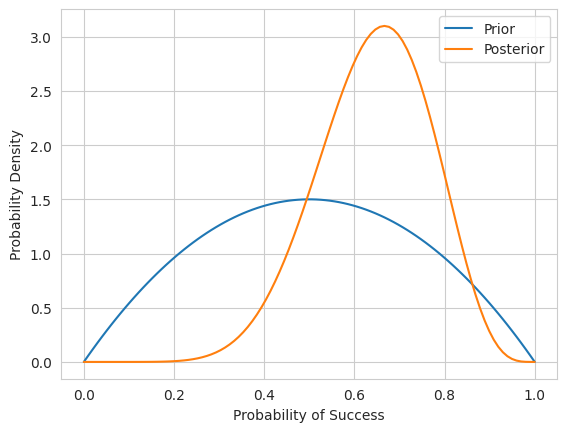

In [13]:
#Q11

import numpy as np
from scipy.stats import beta

def bayesian_inference(prior_alpha, prior_beta, successes, failures):


    posterior_alpha = prior_alpha + successes
    posterior_beta = prior_beta + failures

    return posterior_alpha, posterior_beta

# Example usage
prior_alpha = 2  # Prior belief favoring success
prior_beta = 2   # Prior belief favoring failure

successes = 7
failures = 3

posterior_alpha, posterior_beta = bayesian_inference(prior_alpha, prior_beta, successes, failures)

print(f"Posterior alpha: {posterior_alpha}")
print(f"Posterior beta: {posterior_beta}")

# Visualize the prior and posterior distributions
x = np.linspace(0, 1, 100)
prior_dist = beta.pdf(x, prior_alpha, prior_beta)
posterior_dist = beta.pdf(x, posterior_alpha, posterior_beta)

import matplotlib.pyplot as plt
plt.plot(x, prior_dist, label='Prior')
plt.plot(x, posterior_dist, label='Posterior')
plt.xlabel('Probability of Success')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [14]:
#Q12 D Perform a Chi-square test for independence between two categorical variables in PythonD

import pandas as pd
from scipy.stats import chi2_contingency

# Simpler dataset: Eye color and Handedness
data = {'Eye Color': ['Blue', 'Brown', 'Green', 'Blue', 'Brown', 'Green', 'Blue', 'Brown', 'Green', 'Brown'],
        'Handedness': ['Right', 'Right', 'Left', 'Right', 'Left', 'Right', 'Right', 'Right', 'Left', 'Left']}
df = pd.DataFrame(data)

# Create contingency table
contingency_table = pd.crosstab(df['Eye Color'], df['Handedness'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Observed Frequencies:\n", contingency_table)
print("Expected Frequencies:\n", expected)
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant association between Eye Color and Handedness.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant association between Eye Color and Handedness.")

Observed Frequencies:
 Handedness  Left  Right
Eye Color              
Blue           0      3
Brown          2      2
Green          2      1
Expected Frequencies:
 [[1.2 1.8]
 [1.6 2.4]
 [1.2 1.8]]
Chi-Square Statistic: 3.055555555555556
p-value: 0.2170173927400507
Degrees of Freedom: 2
Fail to reject the null hypothesis.
There is no statistically significant association between Eye Color and Handedness.


In [15]:
#Q13 Write a Python program to calculate the expected frequencies for a Chi-square test based on observed dataD

import numpy as np
from scipy.stats import chi2_contingency

def calculate_expected_frequencies(observed_data):


  chi2_stat, p_value, dof, expected_frequencies = chi2_contingency(observed_data)
  return expected_frequencies

# Example usage:
observed_data = np.array([[20, 18], [30, 22]])
expected_frequencies = calculate_expected_frequencies(observed_data)

print("Observed Frequencies:\n", observed_data)
print("Expected Frequencies:\n", expected_frequencies)

Observed Frequencies:
 [[20 18]
 [30 22]]
Expected Frequencies:
 [[21.11111111 16.88888889]
 [28.88888889 23.11111111]]


In [16]:
#Q14 @D Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution

import numpy as np
from scipy.stats import chisquare

def goodness_of_fit_test(observed_data, expected_data):

  chi2_stat, p_value = chisquare(observed_data, f_exp=expected_data)
  return chi2_stat, p_value

# Example usage:
observed_data = [20, 18, 22, 25, 15]
expected_data = [20, 20, 20, 20, 20]  # Example: Expected uniform distribution

chi2_stat, p_value = goodness_of_fit_test(observed_data, expected_data)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("The observed data does not fit the expected distribution.")
else:
    print("Fail to reject the null hypothesis.")
    print("The observed data may fit the expected distribution.")

Chi-Square Statistic: 2.9
p-value: 0.5746972058298043
Fail to reject the null hypothesis.
The observed data may fit the expected distribution.


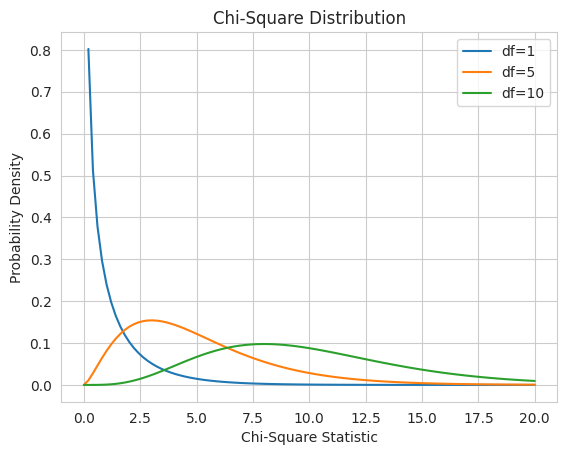

Characteristics of the Chi-Square Distribution:
- Right-skewed: The distribution is skewed to the right.
- Non-negative: The values of the Chi-Square statistic are always non-negative.
- Degrees of Freedom (df):
    - The shape of the distribution depends on the degrees of freedom.
    - As df increases, the distribution becomes more symmetrical and approaches a normal distribution.


In [17]:
#Q15 Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristicsD

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Define degrees of freedom (adjust as needed)
degrees_of_freedom = [1, 5, 10]

# Generate x-values
x = np.linspace(0, 20, 100)

# Plot Chi-square distributions for different degrees of freedom
for df in degrees_of_freedom:
    plt.plot(x, chi2.pdf(x, df), label=f'df={df}')

# Customize the plot
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density')
plt.title('Chi-Square Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Discuss characteristics of the Chi-Square Distribution
print("Characteristics of the Chi-Square Distribution:")
print("- Right-skewed: The distribution is skewed to the right.")
print("- Non-negative: The values of the Chi-Square statistic are always non-negative.")
print("- Degrees of Freedom (df):")
print("    - The shape of the distribution depends on the degrees of freedom.")
print("    - As df increases, the distribution becomes more symmetrical and approaches a normal distribution.")

In [18]:
#Q16  Implement an F-test using Python to compare the variances of two random samplesD

import numpy as np
from scipy.stats import f_oneway

def f_test_for_variance(sample1, sample2, alpha=0.05):


  # Calculate F-statistic
  f_statistic, p_value = f_oneway(sample1, sample2)

  # Determine conclusion
  if p_value < alpha:
    conclusion = "Reject the null hypothesis. Variances are significantly different."
  else:
    conclusion = "Fail to reject the null hypothesis. Variances may not be significantly different."

  return f_statistic, p_value, conclusion

# Example usage:
sample1 = [10, 12, 15, 18, 20]
sample2 = [8, 11, 13, 16, 19]

f_stat, p_value, conclusion = f_test_for_variance(sample1, sample2)

print("F-statistic:", f_stat)
print("p-value:", p_value)
print(conclusion)

F-statistic: 0.3626062322946175
p-value: 0.5637356255524368
Fail to reject the null hypothesis. Variances may not be significantly different.


In [20]:
#Q17 Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the resultsD

import scipy.stats as stats

def perform_anova(groups):


  f_statistic, p_value = stats.f_oneway(*groups)
  return f_statistic, p_value

# Example usage:
group1 = [10, 12, 15, 18, 20]
group2 = [8, 11, 13, 16, 19]
group3 = [14, 16, 18, 21, 23]

groups = [group1, group2, group3]

f_stat, p_value = perform_anova(groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
  print("Reject the null hypothesis.")
  print("There is a statistically significant difference between the means of at least two groups.")
else:
  print("Fail to reject the null hypothesis.")
  print("There is no statistically significant difference between the means of the groups.")

F-statistic: 2.0123456790123457
p-value: 0.17633943086386458
Fail to reject the null hypothesis.
There is no statistically significant difference between the means of the groups.


F-statistic: 2.0123456790123457
p-value: 0.17633943086386458
Fail to reject the null hypothesis.
There is no statistically significant difference between the means of the groups.


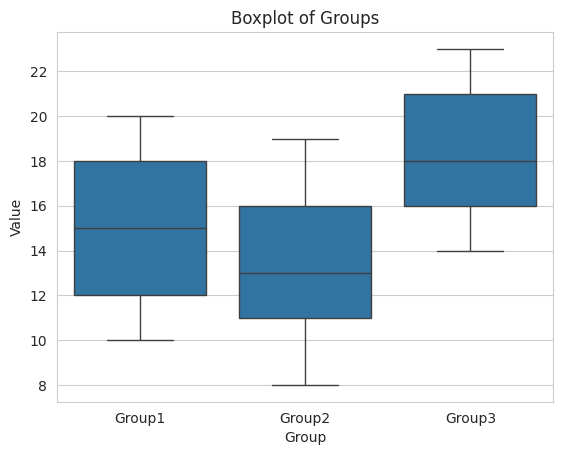

In [21]:
#Q18 Perform a one-way ANOVA test using Python to compare the means of different groups and plot the resultsD

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
group1 = [10, 12, 15, 18, 20]
group2 = [8, 11, 13, 16, 19]
group3 = [14, 16, 18, 21, 23]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant difference between the means of at least two groups.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant difference between the means of the groups.")

# Visualize data
data = {'Group': ['Group1']*len(group1) + ['Group2']*len(group2) + ['Group3']*len(group3),
        'Value': group1 + group2 + group3}
df = pd.DataFrame(data)

sns.boxplot(x='Group', y='Value', data=df)
plt.title('Boxplot of Groups')
plt.show()

In [22]:
#Q19 Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVAD

import scipy.stats as stats
import numpy as np

def check_anova_assumptions(groups, alpha=0.05):

  results = {'normality': True, 'equal_variance': True}

  # 1. Check for Normality (Shapiro-Wilk Test)
  for group in groups:
    stat, p = stats.shapiro(group)
    if p < alpha:
      results['normality'] = False
      break

  # 2. Check for Equal Variance (Levene's Test)
  stat, p = stats.levene(*groups)
  if p < alpha:
    results['equal_variance'] = False

  return results

# Example usage:
group1 = [10, 12, 15, 18, 20]
group2 = [8, 11, 13, 16, 19]
group3 = [14, 16, 18, 21, 23]
groups = [group1, group2, group3]

assumption_checks = check_anova_assumptions(groups)

print("Normality Assumption:", assumption_checks['normality'])
print("Equal Variance Assumption:", assumption_checks['equal_variance'])

Normality Assumption: True
Equal Variance Assumption: True


                             sum_sq   df             F    PR(>F)
C(Factor1)             1.200000e+01  1.0  1.515789e+00  0.253222
C(Factor2)             8.333333e+00  1.0  1.052632e+00  0.334921
C(Factor1):C(Factor2)  9.466331e-30  1.0  1.195747e-30  1.000000
Residual               6.333333e+01  8.0           NaN       NaN


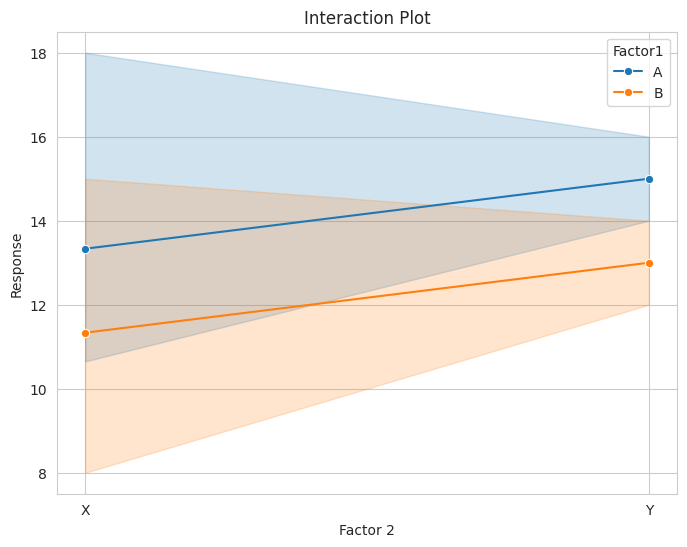

In [23]:
#Q20 Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the result

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
data = {'Factor1': ['A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B'],
        'Factor2': ['X', 'X', 'Y', 'X', 'X', 'Y', 'Y', 'Y', 'X', 'Y', 'Y', 'X'],
        'Response': [10, 12, 15, 8, 11, 13, 14, 16, 18, 12, 14, 15]}
df = pd.DataFrame(data)

# Fit the two-way ANOVA model
model = ols('Response ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

# Visualize the interaction using an interaction plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(x='Factor2', y='Response', hue='Factor1', data=df, marker='o')
plt.title('Interaction Plot')
plt.xlabel('Factor 2')
plt.ylabel('Response')
plt.show()

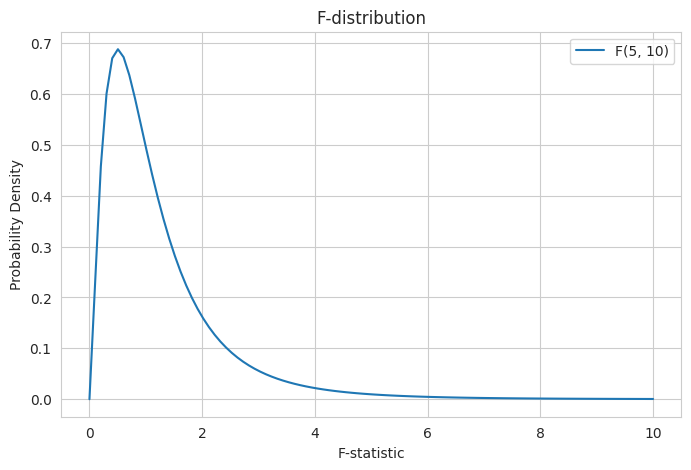


Use of F-distribution in Hypothesis Testing:
- **ANOVA (Analysis of Variance):** Used to compare the variances of two or more groups.
  - Tests the null hypothesis that the means of all groups are equal.
  - The F-statistic is calculated as the ratio of the variance between groups to the variance within groups.
- **Regression Analysis:** Used to test the significance of regression models.
  - Tests whether the regression model explains a significant portion of the variance in the data.
- **Comparing variances of two populations:** Used to determine if the variances of two populations are significantly different.


In [24]:
#Q21  Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Define degrees of freedom for numerator and denominator
dfn = 5  # Degrees of freedom for numerator
dfd = 10  # Degrees of freedom for denominator

# Generate x-values
x = np.linspace(0, 10, 100)

# Calculate the F-distribution probability density function (PDF)
f_dist = f.pdf(x, dfn, dfd)

# Plot the F-distribution
plt.figure(figsize=(8, 5))
plt.plot(x, f_dist, label=f'F({dfn}, {dfd})')
plt.xlabel('F-statistic')
plt.ylabel('Probability Density')
plt.title('F-distribution')
plt.legend()
plt.grid(True)
plt.show()

# Discuss the use of F-distribution in hypothesis testing
print("\nUse of F-distribution in Hypothesis Testing:")
print("- **ANOVA (Analysis of Variance):** Used to compare the variances of two or more groups.")
print("  - Tests the null hypothesis that the means of all groups are equal.")
print("  - The F-statistic is calculated as the ratio of the variance between groups to the variance within groups.")
print("- **Regression Analysis:** Used to test the significance of regression models.")
print("  - Tests whether the regression model explains a significant portion of the variance in the data.")
print("- **Comparing variances of two populations:** Used to determine if the variances of two populations are significantly different.")

F-statistic: 2.0123456790123457
p-value: 0.17633943086386458
Fail to reject the null hypothesis.
There is no statistically significant difference between the means of the groups.


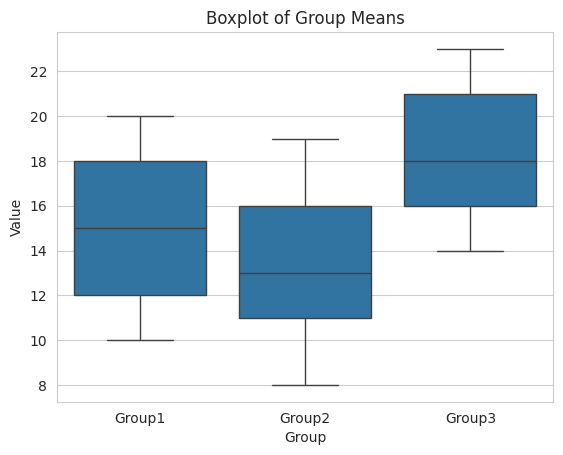

In [25]:
#Q22  D Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
group1 = [10, 12, 15, 18, 20]
group2 = [8, 11, 13, 16, 19]
group3 = [14, 16, 18, 21, 23]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant difference between the means of at least two groups.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant difference between the means of the groups.")

# Visualize data with boxplot
data = {
    'Group': ['Group1'] * len(group1) + ['Group2'] * len(group2) + ['Group3'] * len(group3),
    'Value': group1 + group2 + group3
}
df = pd.DataFrame(data)

sns.boxplot(x='Group', y='Value', data=df)
plt.title('Boxplot of Group Means')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

In [26]:
#Q23 Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the meansD

import numpy as np
from scipy.stats import ttest_1samp

# Parameters for data simulation
population_mean = 50
population_std_dev = 10
sample_size = 30

# Simulate random data from a normal distribution
data = np.random.normal(loc=population_mean, scale=population_std_dev, size=sample_size)

# Hypothesized population mean
hypothesized_mean = 50

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(data, popmean=hypothesized_mean)

# Print results
print("Sample Mean:", np.mean(data))
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence that the population mean is different from the hypothesized mean.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the population mean is different from the hypothesized mean.")

Sample Mean: 50.128847724722235
T-statistic: 0.07114315707388807
p-value: 0.9437721879175207
Fail to reject the null hypothesis.
There is not enough evidence to conclude that the population mean is different from the hypothesized mean.


In [28]:
#Q24 Perform a hypothesis test for population variance using a Chi-square distribution and interpret the resultsD

import numpy as np
from scipy.stats import chi2

def chi_square_test_for_variance(sample, population_variance, alpha=0.05):


  n = len(sample)
  sample_variance = np.var(sample, ddof=1)  # Sample variance with Bessel's correction

  # Calculate chi-square statistic
  chi_square_stat = (n - 1) * sample_variance / population_variance

  # Calculate degrees of freedom
  df = n - 1

  # Calculate p-value
  p_value = 1 - chi2.cdf(chi_square_stat, df)  # For upper-tailed test

  # Determine conclusion
  if p_value < alpha/2:  # Two-tailed test
    conclusion = "Reject the null hypothesis. Population variance is significantly different."
  else:
    conclusion = "Fail to reject the null hypothesis. Population variance may not be significantly different."

  return chi_square_stat, p_value, conclusion

# Example usage:
sample_data = [10, 12, 15, 18, 20]
population_variance_hypothesized = 10

chi_square, p_value, conclusion = chi_square_test_for_variance(sample_data, population_variance_hypothesized)

print("Chi-Square Statistic:", chi_square)
print("p-value:", p_value)
print(conclusion)

Chi-Square Statistic: 6.8
p-value: 0.1468423878254348
Fail to reject the null hypothesis. Population variance may not be significantly different.


In [29]:
#Q25  D Write a Python script to perform a Z-test for comparing proportions between two datasets or groupsD

from statsmodels.stats.proportion import proportions_ztest

def z_test_for_proportions(count1, nobs1, count2, nobs2, alternative='two-sided'):

  z_stat, p_value = proportions_ztest([count1, count2], [nobs1, nobs2], alternative=alternative)
  return z_stat, p_value

# Example usage:
count1 = 50  # Number of successes in group 1
nobs1 = 100  # Total number of observations in group 1
count2 = 40  # Number of successes in group 2
nobs2 = 80   # Total number of observations in group 2

z_stat, p_value = z_test_for_proportions(count1, nobs1, count2, nobs2)

print("Z-statistic:", z_stat)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
  print("Reject the null hypothesis.")
  print("There is a statistically significant difference between the proportions.")
else:
  print("Fail to reject the null hypothesis.")
  print("There is no statistically significant difference between the proportions.")

Z-statistic: 0.0
p-value: 1.0
Fail to reject the null hypothesis.
There is no statistically significant difference between the proportions.


F-statistic: 0.3626062322946175
p-value: 0.5637356255524368
Fail to reject the null hypothesis. Variances may not be significantly different.


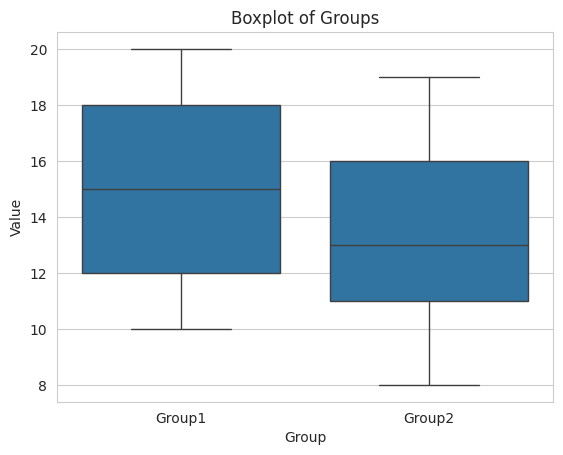

In [30]:
#Q26 D Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results

import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

def f_test_for_variance(sample1, sample2, alpha=0.05):


  f_statistic, p_value = f_oneway(sample1, sample2)

  if p_value < alpha:
    conclusion = "Reject the null hypothesis. Variances are significantly different."
  else:
    conclusion = "Fail to reject the null hypothesis. Variances may not be significantly different."

  return f_statistic, p_value, conclusion

# Example usage:
sample1 = [10, 12, 15, 18, 20]
sample2 = [8, 11, 13, 16, 19]

f_stat, p_value, conclusion = f_test_for_variance(sample1, sample2)

print("F-statistic:", f_stat)
print("p-value:", p_value)
print(conclusion)

# Visualize data with boxplots
data = {
    'Group': ['Group1'] * len(sample1) + ['Group2'] * len(sample2),
    'Value': sample1 + sample2
}
df = pd.DataFrame(data)

sns.boxplot(x='Group', y='Value', data=df)
plt.title('Boxplot of Groups')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

F-statistic: 0.1386001386001386
p-value: 0.7174450759044151
Fail to reject the null hypothesis. Variances may not be significantly different.


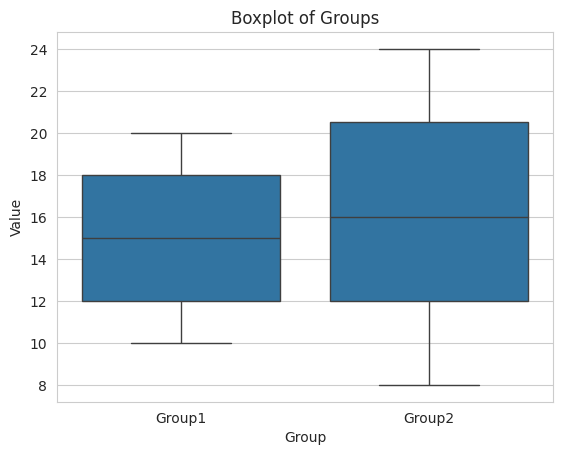

In [31]:
#Q27   Perform a Chi-square test for goodness of fit with simulated data and analyze the results

import numpy as np
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def f_test_for_variance(sample1, sample2, alpha=0.05):


  f_statistic, p_value = f_oneway(sample1, sample2)

  if p_value < alpha:
    conclusion = "Reject the null hypothesis. Variances are significantly different."
  else:
    conclusion = "Fail to reject the null hypothesis. Variances may not be significantly different."

  return f_statistic, p_value, conclusion

# Example usage:
sample1 = [10, 12, 15, 18, 20]
sample2 = [8, 11, 13, 16, 19, 22, 24]

f_stat, p_value, conclusion = f_test_for_variance(sample1, sample2)

print("F-statistic:", f_stat)
print("p-value:", p_value)
print(conclusion)

# Visualize data with boxplots
data = {
    'Group': ['Group1'] * len(sample1) + ['Group2'] * len(sample2),
    'Value': sample1 + sample2
}
df = pd.DataFrame(data)

sns.boxplot(x='Group', y='Value', data=df)
plt.title('Boxplot of Groups')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()